# Differential equations and numerical integration
## Euler method

We will mainly use ordinary differential equations of the form.

\begin{equation}
\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},\vec{p},t)
\end{equation}

Here $\vec{x}$ is a vector of state variables at time $t$.
The parameters of the system are represented
by the vector $\vec{p}$.

In one dimension, the system is written as
\begin{equation} \label{eq:SimpleEq}
\frac{dx}{dt} = f(x) \quad \mbox{with} \quad x(t=0) := x_0
\end{equation}

The simplest way to solve the equation numerically 
is the Euler integration
\begin{equation}
f(x) = \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}
\end{equation}

We obtain
\begin{equation}
x(t+\Delta t) \; = \;  x(t) \; + \; \Delta t \;   f(x(t)) \; + \;  {\cal O}(\Delta t^2)
\end{equation}

Starting from an initial value $x_0$ at time $t=0$ the solution
can now be determined for later time points.

It is of importance to consider the error of the method.
The Euler method introduces an error of ${\cal O}(\Delta t^2)$ per
integration step.
To obtain the solution $x(t)$ at a time $t=T$, $N=T/\Delta t$ integration steps
have to be performed. 
The total error is therefore of the order ${\cal O}(T \Delta t)$ 
and decreases with decreasing $\Delta t$.
Euler integration is a first-order method.
The method is rarely used in real life (too inefficient).

**The Euler Method**
\begin{equation} \label{eq:EulerSimpleEquation}
\frac{dx}{dt} = f(x) = -k x \quad \mbox{with} \quad x(0) = x_0
\end{equation}


The analytical solution at time $t$ is 
\begin{equation} \label{eq:EulerBeispiel}
x(t) = x_0 \exp(-k t)
\end{equation}


We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simple_euler(x0,T,N):
    """ The function integrates the simple
    system dx/dt = -k x to a time T using the  
    Euler method (N Steps) and initial condition x0.

    usage: x = SimpleEuler(x0,T,N)
    """
    k = 1 # set parameter k

    # some parameters
    dt = float(T)/N
    timespan = np.arange(0,T,dt)
    x = [float(x0)]

    # integration
    for i in range(1,N):
        x.append(x[i-1]+dt*(-k*x[i-1]))
        
    # plot both solutions
    f, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(timespan, x,'ko', markersize=8, label='Euler method')
    ax.plot(timespan, x0*np.exp(-k*timespan), 'r-', label='analytical solution')
    ax.set_xlabel('time t')
    ax.set_ylabel('x(t)')
    ax.legend(loc='upper right')
    plt.show()

    # return value of function
    x = x[N-1]

    return x, dt

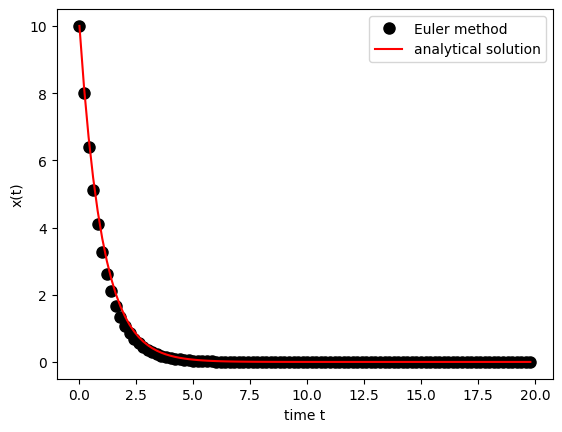

(2.5462949704181095e-09, 0.2)

In [4]:
simple_euler(x0=10, T=20, N=100)

**Exercise:** We do know the true value $x(t=1)$ using an analytical solution. Compare the numerical estimates for different values of `N` and plot the error as a function of `1/N`. 
What does `N` stand for? How does the graph look like? Why?

## Numerical integration in python
The module `scipy.integrate` offers a variety of build-in functions for numerical integration. We will mainly use the function `odeint`.

In [5]:
from scipy.integrate import odeint

We first consider a simple linear ODE of the form

\begin{equation}
\frac{dx}{dt} = c - k \cdot x ~~,
\end{equation}
where $c$ and $k$ are parameters.
The steady state $x^0$ of the system can be straightforwardly calculated

\begin{equation}
\frac{dx}{dt} =0 \quad \leftrightarrow \quad x^0 = \frac{c}{k}
\end{equation}

To solve the system numerically, we must implement the function $f(x,t) = c - k \cdot x$
into a user-defined {\tt python} function.

In [9]:
def simple_ode(x,t):
    """
    The function implements the simple linear
    ODE dxdt = c -k*x
    """
    # define parameters
    c = 1.0
    k = 2.0

    dxdt = c - k*x

    return dxdt 

To integrate the system numerically, we need to specify the initial condition $x^0 = x(t=0)$ and a timespan. Using `odeint`:

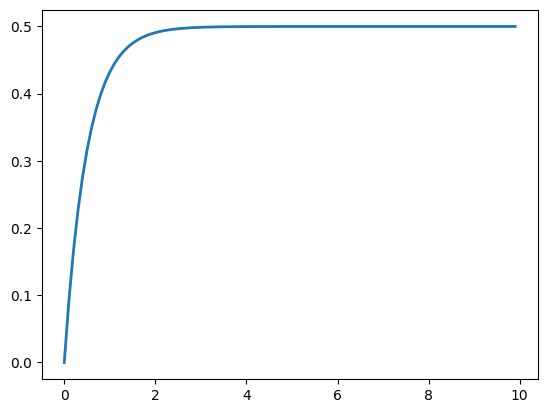

In [10]:
from scipy.integrate import odeint
import numpy as np
# from my_func import simple_ode

# initial condition and time span
T = np.arange(0, 10, 0.1)
X0 = 0

X = odeint(simple_ode, X0, T)
plt.plot(T, X, linewidth=2)
plt.show()

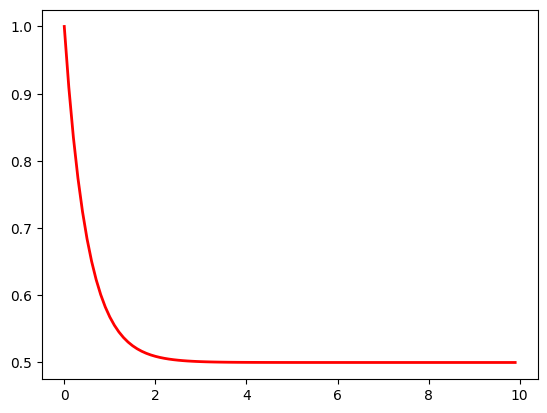

In [11]:
X0 = 1

X = odeint(simple_ode, X0, T)
plt.plot(T, X, 'r', linewidth=2)
plt.show()